In [339]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score


In [340]:
application_record_df = pd.read_csv("./Resources/application_record.csv")
credit_record_df = pd.read_csv("./Resources/credit_record.csv")

In [341]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [342]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [343]:
merged_df = pd.merge(application_record_df, credit_record_df, on='ID', how='inner')

merged_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [344]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [345]:
df = merged_df.copy()
#df.drop('MONTHS_BALANCE', axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [346]:
df['STATUS'].value_counts()

STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [347]:
# Filter DataFrame for clients with only 'C' and 'X' and '0' in their STATUS
cx0_clients = df[df['STATUS'].isin(['C', 'X', '0'])]

# Verify that these clients have only 'C' and 'X' in their STATUS by checking unique values per client
# This creates a boolean mask indicating whether each client only has 'C' and 'X'
cx0_mask = cx0_clients.groupby('ID')['STATUS'].transform(lambda x: set(x).issubset({'C', 'X', '0'}))

# Apply mask
cx0_clients = cx0_clients[cx0_mask]

In [348]:
cx0_clients['STATUS'].value_counts()

STATUS
C    329536
0    290654
X    145950
Name: count, dtype: int64

In [349]:
# Now, filter out clients who do not have at least 6 months of 'MONTHS_BALANCE'
# We first calculate the max 'MONTHS_BALANCE' (absolute value) for each client
max_months_balance = cx0_clients.groupby('ID')['MONTHS_BALANCE'].transform(lambda x: abs(x).max())

# Apply the filter for at least 6 months
cx0_clients_filtered = cx0_clients[max_months_balance >= 6]

# Display the filtered DataFrame
cx0_clients_filtered

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777708,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-7,0
777709,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-8,0
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [350]:
# Looking into one client
specific_user_data = cx0_clients_filtered[cx0_clients_filtered['ID'] == 5149838]
specific_user_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C
777659,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-1,C
777660,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-2,C
777661,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-3,C
777662,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-4,C
777663,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-5,C
777664,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-6,C
777665,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-7,C
777666,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-8,C
777667,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-9,C


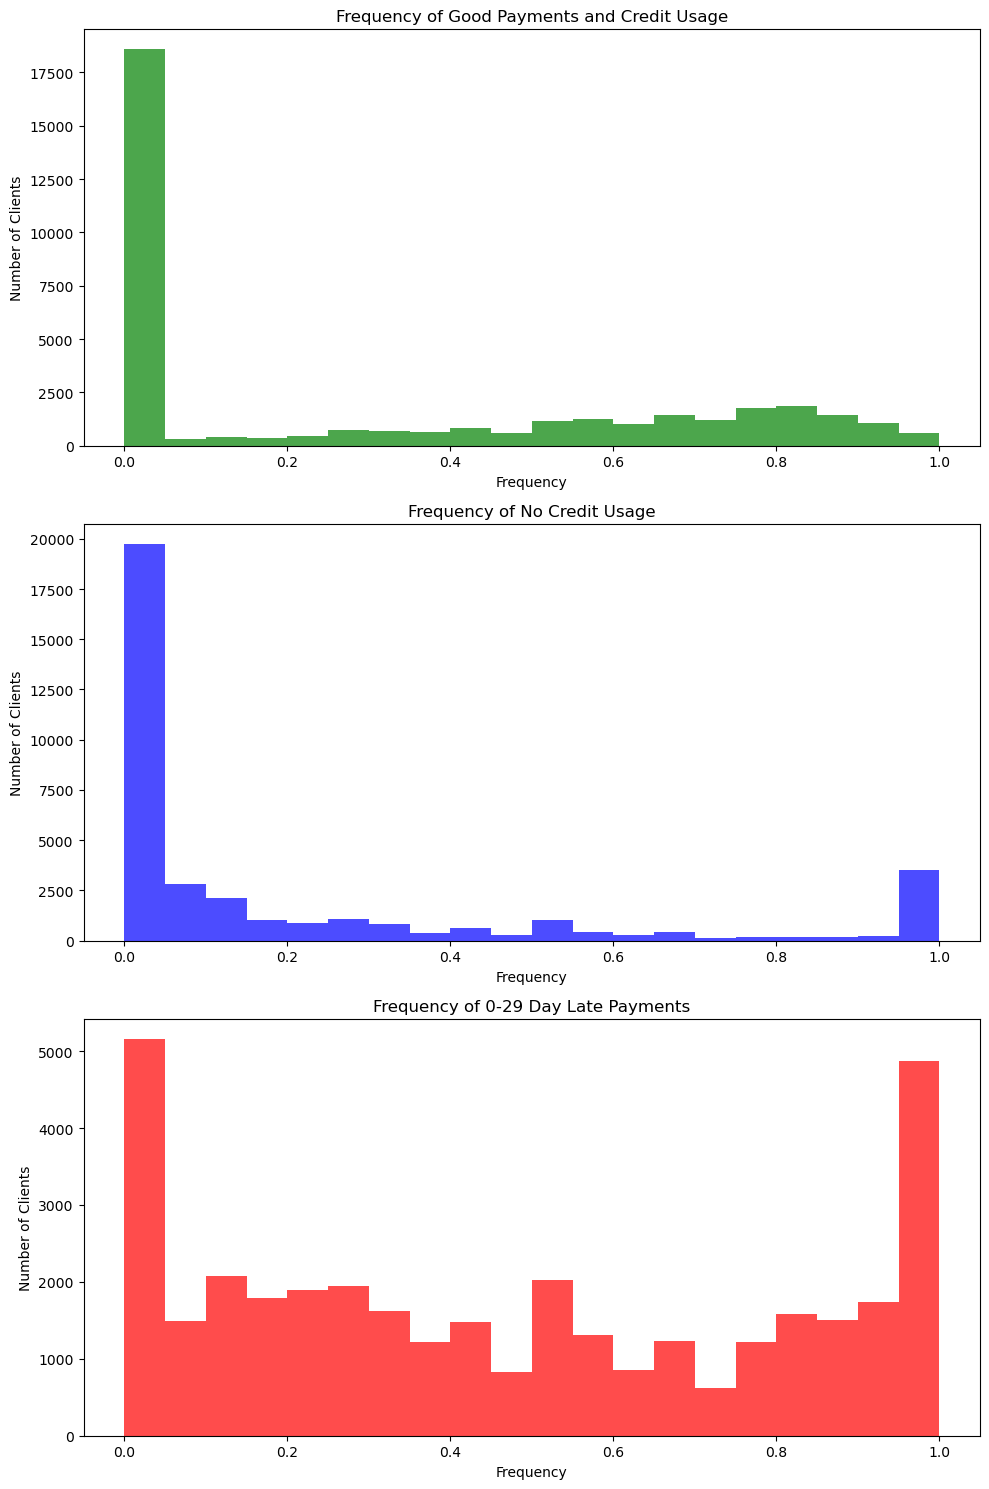

In [351]:
# Calculate the count of 'C' and 'X' and '0'for each user
# Assuming 'df' is your merged DataFrame containing the 'STATUS' and 'ID' columns
status_counts = df.groupby(['ID', 'STATUS']).size().unstack(fill_value=0)

# Calculate frequencies by dividing each status count by the total counts per user
status_frequencies = status_counts.div(status_counts.sum(axis=1), axis=0)


# Assuming status_frequencies contains the frequency of each status ('C', 'X', '0') per user
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

if 'C' in status_frequencies.columns:
    axes[0].hist(status_frequencies['C'], bins=20, alpha=0.7, color='green')
    axes[0].set_title('Frequency of Good Payments and Credit Usage')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Number of Clients')

if 'X' in status_frequencies.columns:
    axes[1].hist(status_frequencies['X'], bins=20, alpha=0.7, color='blue')
    axes[1].set_title('Frequency of No Credit Usage')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Number of Clients')

if '0' in status_frequencies.columns:
    axes[2].hist(status_frequencies['0'], bins=20, alpha=0.7, color='red')
    axes[2].set_title('Frequency of 0-29 Day Late Payments')
    axes[2].set_xlabel('Frequency')
    axes[2].set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()



In [352]:

# Calculate the frequency of each status for each user
status_frequency = cx0_clients_filtered.groupby('ID')['STATUS'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate the average frequency of 'C' across all users who only have 'C', 'X', and '0' in their STATUS
average_c_frequency = status_frequency['C'].mean()

print(f"Average frequency of 'C' among CX0 users: {average_c_frequency}")

Average frequency of 'C' among CX0 users: 0.33666211822970865


Text(0.5, 1.0, 'Density of 0 Status Frequency vs. Months Balance')

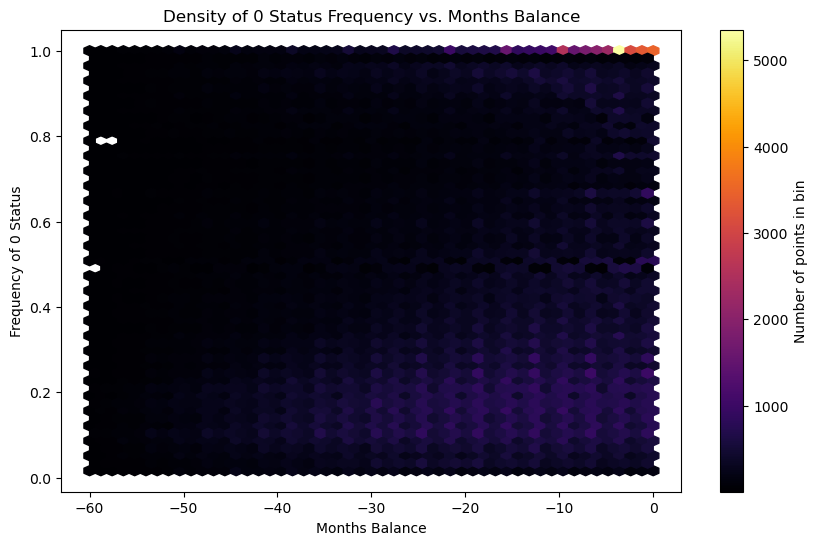

In [353]:
# Look into the frequency of '0' over the months the client has maintaind their account

# Group by ID and calculate the frequency of each status
status_frequency = df.groupby('ID')['STATUS'].value_counts(normalize=True).unstack(fill_value=0)

# Now, merge this with the MONTHS_BALANCE information
merged_info = pd.merge(df[['ID', 'MONTHS_BALANCE']].drop_duplicates(), status_frequency, on='ID')

# Filtering to include only rows where '0' status frequency is available
zero_frequency_data = merged_info[merged_info['0'] > 0]

plt.figure(figsize=(10, 6))

# Adjust the gridsize for finer or coarser hexagons, and set mincnt to 1 or more to exclude hexagons with fewer points.
# The 'cmap' value is set to a palette that provides a good contrast, like 'Greens' or 'Blues'. 
# You can also try 'inferno', 'plasma', 'viridis', etc., for a more vivid color scheme.
plt.hexbin(zero_frequency_data['MONTHS_BALANCE'], zero_frequency_data['0'], gridsize=50, cmap='inferno', mincnt=1)
cb = plt.colorbar(label='Number of points in bin')

# Enhancing contrast and visibility
cb.set_label('Number of points in bin')
plt.xlabel('Months Balance')
plt.ylabel('Frequency of 0 Status')
plt.title('Density of 0 Status Frequency vs. Months Balance')

# Optionally, adjust the limits of the colorbar to make the color mapping more sensitive to the range of values in your data



In [354]:
# Step 1: Filter users with at least one '0' appearance
users_with_zero = df[df['STATUS'] == '0']['ID'].unique()

# Step 2 & 3: Calculate the number of '0' appearances and total months recorded for each user
zero_counts_per_user = df[df['ID'].isin(users_with_zero)].groupby('ID')['STATUS'].apply(lambda x: (x == '0').sum())
total_months_per_user = df[df['ID'].isin(users_with_zero)].groupby('ID')['MONTHS_BALANCE'].nunique()

# Step 4: Calculate average number of '0' appearances per 12 months
average_zeros_per_12_months = (zero_counts_per_user / total_months_per_user * 12).mean()
average_zeros_per_12_months_half = average_zeros_per_12_months / 2
average_zeros_per_12_months_half_half = average_zeros_per_12_months_half / 2

# Printing the result
print(f"Average number of '0' appearances per 12 months for users with at least one '0': {average_zeros_per_12_months}")


Average number of '0' appearances per 12 months for users with at least one '0': 6.471897774771895


/tmp/ipykernel_6453/3397970603.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  months_range = df.groupby('ID')['MONTHS_BALANCE'].agg([min, max])
/tmp/ipykernel_6453/3397970603.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  months_range = df.groupby('ID')['MONTHS_BALANCE'].agg([min, max])


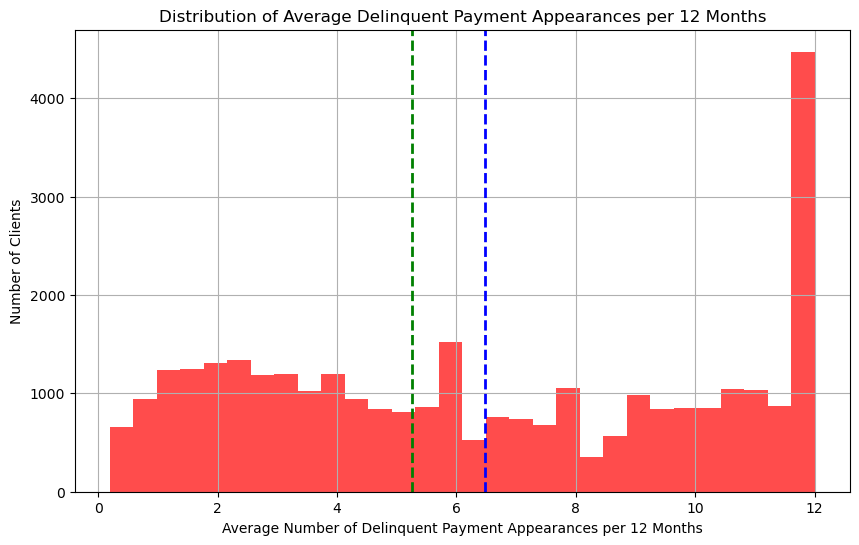

In [355]:
users_with_zero = df[df['STATUS'] == '0']
zero_counts = users_with_zero.groupby('ID')['STATUS'].count()
# Calculate the range of MONTHS_BALANCE for each user
months_range = df.groupby('ID')['MONTHS_BALANCE'].agg([min, max])
months_range['duration'] = months_range['max'] - months_range['min'] + 1

# Merge this information with zero_counts
average_zeros_per_year = pd.merge(zero_counts, months_range['duration'], on='ID')

# Calculate the average number of '0' appearances per 12 months
average_zeros_per_year['avg_per_12_months'] = (average_zeros_per_year['STATUS'] / average_zeros_per_year['duration']) * 12

plt.figure(figsize=(10, 6))
plt.axvline(x=average_zeros_per_12_months, color='b', linestyle='--', linewidth=2, label=f"Average = {average_zeros_per_12_months}")
plt.axvline(x=target_average_zeros, color='g', linestyle='--', linewidth=2, label=f"Average = {average_zeros_per_12_months_half}")

plt.hist(average_zeros_per_year['avg_per_12_months'], bins=30, alpha=0.7, color='red')
plt.xlabel('Average Number of Delinquent Payment Appearances per 12 Months')
plt.ylabel('Number of Clients')
plt.title('Distribution of Average Delinquent Payment Appearances per 12 Months')
plt.grid(True)
plt.show()

In [356]:
target_average_zeros = 5.25 # the chart below led me to select this value

In [357]:
# Next up, setting the targets based on the conditions a client must meet 

In [358]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [359]:
df['Target'] = np.nan
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,NaN
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,NaN
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,NaN
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,NaN
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-9,0,NaN
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-10,2,NaN
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-11,1,NaN
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-12,0,NaN


In [360]:
# Setting target params

# Step 1: Calculate the number of '0' appearances and total months recorded for each user
zero_counts_per_user = df[df['STATUS'] == '0'].groupby('ID')['STATUS'].apply(lambda x: (x == '0').sum())
total_months_per_user = df.groupby('ID')['MONTHS_BALANCE'].nunique()

# Step 2: Calculate average number of '0' appearances per 12 months for each user
average_zeros_per_12_months_per_user = zero_counts_per_user / total_months_per_user * 12


# Group by 'ID' and check conditions
for id, group in df.groupby('ID'):
    # Initialize target as None
    target = None
    
    # Condition 1: Check if any status is not 'C' or 'X'
    if not all(group['STATUS'].isin(['C', 'X', '0'])):
        target = 0
    # Condition 2: Check for at least one 'MONTHS_BALANCE' >= 12 (in absolute)
    elif not any(group['MONTHS_BALANCE'].abs() >= 6):
        target = 0

    elif average_zeros_per_12_months_per_user.get(id, 0) >= target_average_zeros:
        target = 0
    # Condition 3: Calculate the average frequency of 'C' and compare to 56%
    else:
        c_frequency = (group['STATUS'] == 'C').mean() * 100
        target = 1 if c_frequency >= 30 else 0
    
    # Assign target value for the group
    df.loc[df['ID'] == id, 'Target'] = target

# Check if there are still any NaN values in 'Target'
nan_in_target = df['Target'].isna().sum()
print(f"NaN values in 'Target': {nan_in_target}")

NaN values in 'Target': 0


In [361]:
frequncy = df['Target'].value_counts()
frequncy

Target
0.0    440195
1.0    337520
Name: count, dtype: int64

In [362]:
training_df = df.copy()

In [363]:
training_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,0.0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,0.0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,0.0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,0.0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-9,0,0.0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-10,2,0.0
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-11,1,0.0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-12,0,0.0


In [364]:
# Step 1: Prepare the data
# Exclude 'STATUS', 'MONTHS_BALANCE', and any other non-feature columns like 'ID'
X = training_df.drop(['Target', 'STATUS', 'MONTHS_BALANCE', 'ID'], axis=1)  # Adjust as needed
y = training_df['Target']


In [365]:
# Double check y is accurate
y.value_counts()

Target
0.0    440195
1.0    337520
Name: count, dtype: int64

In [366]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  FLAG_MOBIL           777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  OCCUPATION_TYPE  

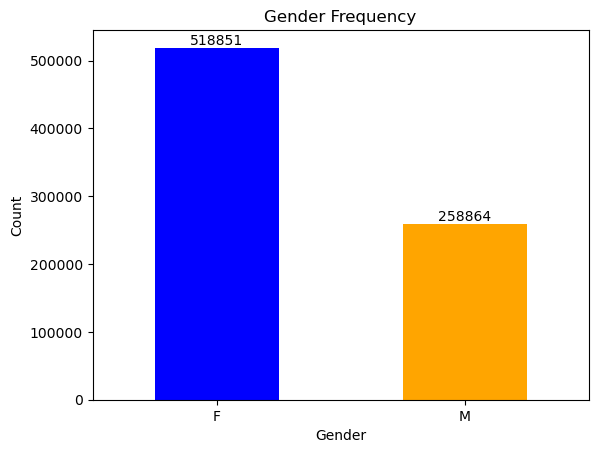

In [367]:
frequency = X['CODE_GENDER'].value_counts()
frequency.plot(kind='bar', color=['blue', 'orange'])

plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the gender labels horizontal for better readability

# Adding value labels above each bar
for index, value in enumerate(frequency):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [368]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)


In [369]:
X_train['CODE_GENDER'].value_counts()

CODE_GENDER
F    347434
M    173635
Name: count, dtype: int64

In [370]:
X_test['CODE_GENDER'].value_counts()

CODE_GENDER
F    171417
M     85229
Name: count, dtype: int64

In [371]:
y_train.value_counts()

Target
0.0    295101
1.0    225968
Name: count, dtype: int64

In [372]:
y_test.value_counts()

Target
0.0    145094
1.0    111552
Name: count, dtype: int64

In [373]:
# Identify numerical and categorical columns (example placeholders)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns


In [374]:
# Step 2: Define preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [375]:
# Step 3: Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [376]:
# next, compare the default threshold to a modified threshold for tuning . 

In [377]:
y_pred = model.predict(X_test)

In [451]:
# Tuning the decision threshold, the goal here is to reduce false negatives. 
y_probs = model.predict_proba(X_test)[:, 1]  
threshold = 0.545
y_pred_adjusted = (y_probs >= threshold).astype(int)

In [452]:
y_probs.size

256646

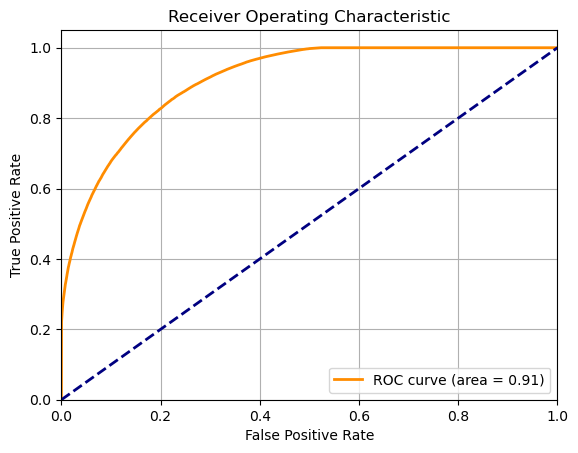

In [453]:

# Calculate TPR, FPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


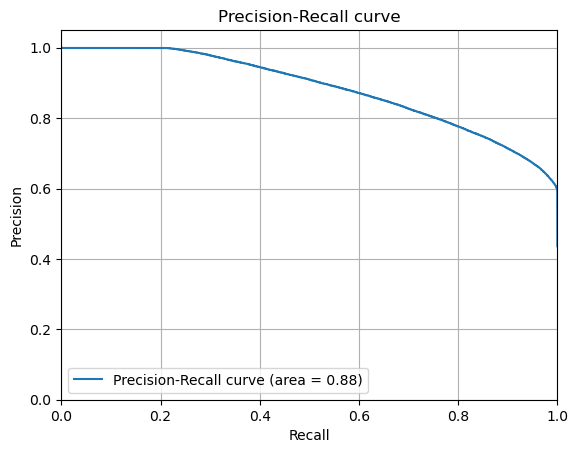

In [454]:
# Calculate precision and recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.grid(True)
plt.step(recall, precision, where='post', label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()

In [455]:
# Step 4: Evaluate the model

In [456]:
# Original predictions metrics
accuracy_orig = accuracy_score(y_test, y_pred)
precision_orig = precision_score(y_test, y_pred)
recall_orig = recall_score(y_test, y_pred)
f1_orig = f1_score(y_test, y_pred)

# Adjusted predictions metrics
accuracy_adj = accuracy_score(y_test, y_pred_adjusted)
precision_adj = precision_score(y_test, y_pred_adjusted)
recall_adj = recall_score(y_test, y_pred_adjusted)
f1_adj = f1_score(y_test, y_pred_adjusted)


metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original': [accuracy_orig, precision_orig, recall_orig, f1_orig],
    'Adjusted': [accuracy_adj, precision_adj, recall_adj, f1_adj]
})

print(metrics_df)

      Metric  Original  Adjusted
0   Accuracy  0.810322  0.812625
1  Precision  0.747715  0.768909
2     Recall  0.850617  0.813361
3   F1 Score  0.795853  0.790510


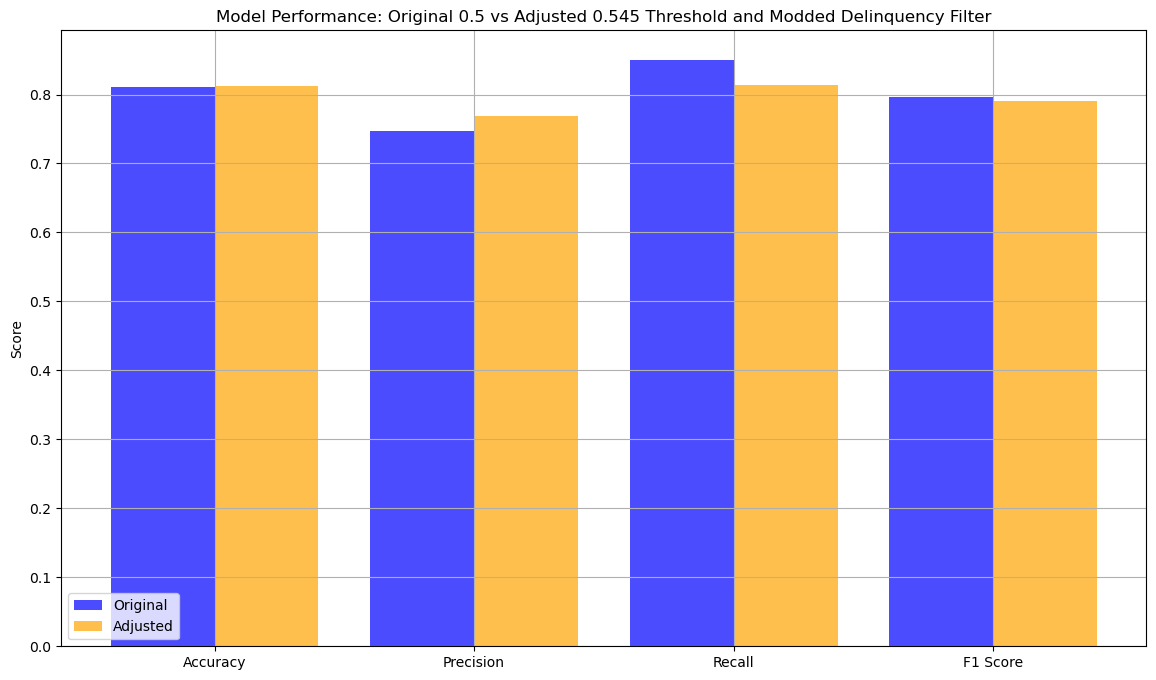

In [457]:
# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
original_scores = [accuracy_orig, precision_orig, recall_orig, f1_orig]
adjusted_scores = [accuracy_adj, precision_adj, recall_adj, f1_adj]

# Setting up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Setting the positions and width for the bars
pos = list(range(len(original_scores)))
width = 0.4

# Plotting bars for original and adjusted scores
plt.bar(pos, original_scores, width, alpha=0.7, label='Original', color='blue')
plt.bar([p + width for p in pos], adjusted_scores, width, alpha=0.7, label='Adjusted', color='orange')

# Setting the y-axis label, chart title, and x-axis ticks
ax.set_ylabel('Score')
ax.set_title(f"Model Performance: Original 0.5 vs Adjusted {threshold} Threshold and Modded Delinquency Filter")
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(metrics)

# Adding the legend and grid
plt.legend(['Original', 'Adjusted'], loc='lower left')
plt.grid()

# Show the plot
plt.show()

In [458]:
# confusion_matrix

cm = confusion_matrix(y_test, y_pred_adjusted)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to percentages
cm_percentage = cm_normalized * 100

cm_percentage

array([[81.20597682, 18.79402318],
       [18.66394148, 81.33605852]])

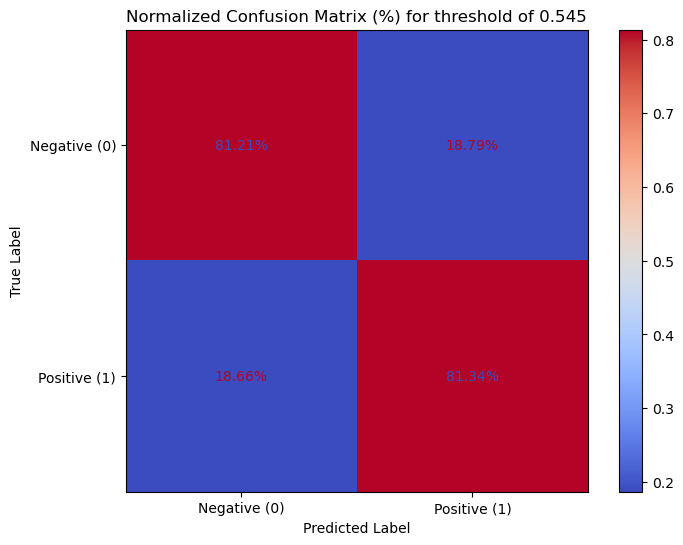

In [459]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['Negative (0)', 'Positive (1)']

# Normalize the confusion matrix to show percentages
cm_normalized = cm_percentage / 100

# Create a ConfusionMatrixDisplay instance with the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)

# Plot the confusion matrix with percentages
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='coolwarm', ax=ax, values_format='.2%')  # Using percentage format

# Adding labels and title for clarity
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(f"Normalized Confusion Matrix (%) for threshold of {threshold}")

plt.show()

In [470]:

import joblib
joblib.dump(model, 'random_forest_model_v2.joblib')

['random_forest_model_v2.joblib']

In [464]:
# define a function to approve or decline a new applicant

def make_decision(new_applicant):
    # Ensure the new_applicant DataFrame aligns with the training data's expectations
    # This includes proper handling of categorical and numerical features as per the training preprocessing steps
    
    # Directly apply the full preprocessing and prediction pipeline to the new applicant data
    # This approach ensures that new_applicant data is subjected to the same transformations as the training data
    new_applicant_prediction = model.predict(new_applicant)
    print(new_applicant_prediction[0])
    
    if new_applicant_prediction[0] == 0.0:
        return 'Declined'
    else:
        return 'Approved'


In [465]:
# Simulating a new applicant's data
new_applicant = pd.DataFrame([{
    "CODE_GENDER": "F",
    "FLAG_OWN_CAR": "Y",
    "FLAG_OWN_REALTY": "N",
    "CNT_CHILDREN": 0,
    "AMT_INCOME_TOTAL": 0.0,
    "NAME_INCOME_TYPE": "Working",
    "NAME_EDUCATION_TYPE": "Higher education",
    "NAME_FAMILY_STATUS": "Married",
    "NAME_HOUSING_TYPE": "With parents",
    "DAYS_BIRTH": -2000,
    "DAYS_EMPLOYED": -30,
    "FLAG_MOBIL": 1,
    "FLAG_WORK_PHONE": 0,
    "FLAG_PHONE": 1,
    "FLAG_EMAIL": 1,
    "OCCUPATION_TYPE": "Unemployed",
    "CNT_FAM_MEMBERS": 0.0,
}])

In [466]:
# Process applicant

result = make_decision(new_applicant)

print(f"The application status is: {result}")

0.0
The application status is: Declined


In [467]:
# Creating an applicant that should be approved

new_applicant_2 = pd.DataFrame([{
    "CODE_GENDER": "F",
    "FLAG_OWN_CAR": "N",
    "FLAG_OWN_REALTY": "Y",
    "CNT_CHILDREN": 0,
    "AMT_INCOME_TOTAL": 170000.0,
    "NAME_INCOME_TYPE": "Commercial associate",
    "NAME_EDUCATION_TYPE": "Secondary / secondary special",
    "NAME_FAMILY_STATUS": "Single / not married",
    "NAME_HOUSING_TYPE": "House / apartment",
    "DAYS_BIRTH": -19110,
    "DAYS_EMPLOYED": -3200,
    "FLAG_MOBIL": 1,
    "FLAG_WORK_PHONE": 0,
    "FLAG_PHONE": 1,
    "FLAG_EMAIL": 1,
    "OCCUPATION_TYPE": "Sales staff",
    "CNT_FAM_MEMBERS": 1.0,
}])

In [468]:
# Process applicant

result = make_decision(new_applicant_2)

print(f"The application status is: {result}")

1.0
The application status is: Approved
